# Basic Systems Biology Graphics

The examples shown here are based on Uri Alon's book "An Introduction to Systems Biology: Design Principles of Biological Circuits, Second Edition".

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Bifurcation Diagram for the Logistic Map

First, I wanted to learn what a bifurcation diagram was, so I plotted it for the Logistic map based on code found [here](https://en.wikipedia.org/wiki/Logistic_map).

In [12]:
R = np.linspace(2.4, 4.0, 10000)
Y = []
for r in R:
    x = np.random.random()
    for i in range(1000):
        x = r*x*(1-x)
    Y.append(x)

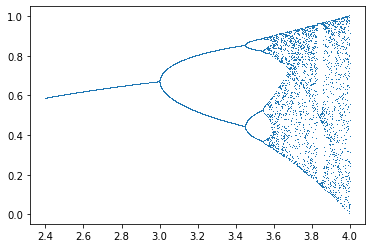

In [13]:
plt.plot(R, Y, ls='', marker=',')
plt.show()

# Nullcline

Next, I wanted to plot the nullcline shown in Figure 5.9 that shows bistability for the system

\begin{align*} 
\frac{dX}{dt}=f(Y)-αX \\ 
\frac{dY}{dt}=f(X)-αY
\end{align*}

where $f(X)$ is the decreasing Hill function $$f(X)=β\frac{K^n}{K^n+X^n}$$

There is also an increasing version where the numerator is instead $X^n$.
Note that it is equivalent to let a constant $K_1=K^n$.

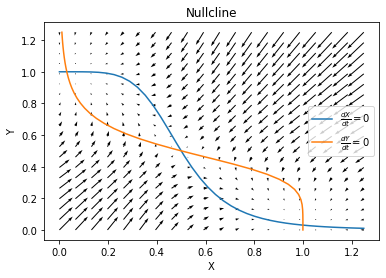

In [14]:
def f(X):
    β = 1
    K = 0.5
    n = 5
    return β*K**n/(K**n+X**n)

def dxdt(X, Y):
    α1 = 1
    return f(Y)-α1*X

def dydt(X, Y):
    α2 = 1
    return f(X)-α2*Y

x = np.linspace(0, 1.25, 40)

fig, ax = plt.subplots(facecolor='w')
plt.plot(x, f(x))
plt.plot(f(x), x)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Nullcline")
ax.legend(["$\\frac{dX}{dt}=0$", "$\\frac{dY}{dt}=0$"])

x = np.linspace(0, 1.25, 20)
X, Y = np.meshgrid(x, x)
U = np.zeros((len(X), len(Y)))
V = np.zeros((len(X), len(Y)))  

for i in range(len(X)):
    for j in range(len(Y)):
        U[i, j] = dxdt(X[i, j], Y[i, j])
        V[i, j] = dydt(X[i, j], Y[i, j])
        
q = ax.quiver(X, Y, U, V)

plt.show()

We see from the vector field above that the steady state represented by the intersection in the center is unstable, while the two other intersections are stable.
This shows that the system is bistable because it has two stable steady states.

Next, I wanted to graph a spiral oscillation as shown in Figure 6.6. 
I got something similar (although it is centered around the origin) by plotting the vector field given by

\begin{align*}
\frac{dx}{dt}&=-β_1y-α_1x \\
\frac{dy}{dt}&=β_2x-α_2y
\end{align*}

We can get this system by linearizing

\begin{align*}
\frac{dX}{dt}&=f(Y)-α_1X \\
\frac{dY}{dt}&=g(X)-α_2Y
\end{align*}

where $f$ is decreasing and $g$ is increasing.

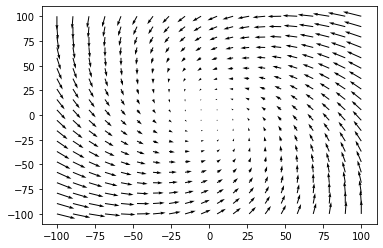

In [22]:
def dxdt(x, y):
    beta_1 = 1
    alpha_1 = 1
    return -beta_1*y-alpha_1*x

def dydt(x, y):
    beta_2 = 1
    alpha_2 = 0.5
    return beta_2*x - alpha_2*y

fig, ax = plt.subplots(facecolor='w')

x = np.linspace(-100, 100, 20)
X, Y = np.meshgrid(x, x)
U = np.zeros((len(X), len(Y)))
V = np.zeros((len(X), len(Y)))  

for i in range(len(X)):
    for j in range(len(Y)):
        U[i, j] = dxdt(X[i, j], Y[i, j])
        V[i, j] = dydt(X[i, j], Y[i, j])
        
q = ax.quiver(X, Y, U, V)

plt.show()

# Rate Plots

Consider the system

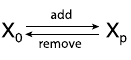

which occurs in living cells with $X_p$ being the phosphorylated version of $X_0$. 
Here, the "add" direction phosphorylzation is induced by the kinase Cdc25, and the "remove" direction dephosphorylation is induced by the phosphatase Wee1.

We can write the change in quantity of $X_p$ as

\begin{align*}
\frac{dX_p}{dt}&=βX_0-αX_p
\end{align*}

and graph it on a rate plot.

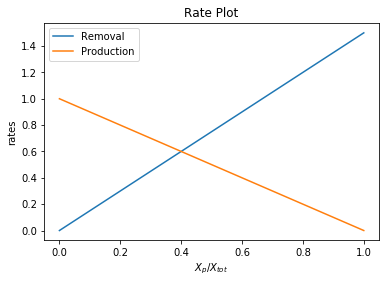

In [16]:
fig, ax = plt.subplots(facecolor='w')

X = np.linspace(0, 1, 20)
β = 1 # rate of phosphatase
α = 1.5 # rate of kinase
plt.plot(X, α*X)
plt.plot(X, β*(1-X))
ax.set_xlabel("$X_p/X_{tot}$")
ax.set_ylabel("rates")
ax.set_title("Rate Plot")
ax.legend(["Removal", "Production"])
plt.show()

Now consider the following system with an additional two arrows:

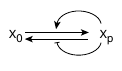

where $X$ activates its phosphorylation through Cdc25 and inhibits its dephosphorylation through Wee1.

We can produce another rate plot that actually suggests why this system, as well as many others, have developed double autoregulation on $X_p$!

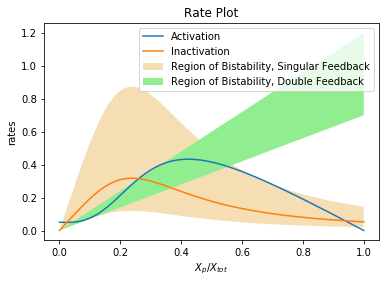

In [17]:
# uh stands for "uphill Hill", the increasing Hill function.
def uh(x, k, n):
    return x**n/(k**n+x**n)

# "downhill Hill"
def dh(x, k, n):
    return k**n/(k**n+x**n)

fig, ax = plt.subplots(facecolor='w')

x = np.linspace(0, 1, 100)

k2 = 1
n1 = 3
n2 = 3
K1 = 0.3
K2 = 0.3
β1 = 0
β2 = 0.05

alpha = 0.7
alpha = 2

def f(k1):
    return k1*x*(β1*uh(x, K1, n1) + dh(x, K1, n1))

def g(alpha):
    return alpha*x

ax.fill_between(x, f(0.75), f(5.5), facecolor='wheat')
ax.fill_between(x, g(0.7), g(1.2), facecolor='lightgreen')

ax.plot(x, k2*(1-x)*(β2*dh(x, K2, n2) + uh(x, K2, n2)))
ax.plot(x, f(2))

ax.set_xlabel("$X_p/X_{tot}$")
ax.set_ylabel("rates")
ax.set_title("Rate Plot")
ax.legend(["Activation", 
           "Inactivation", 
           "Region of Bistability, Singular Feedback",
           "Region of Bistability, Double Feedback"])
plt.show()

The plot below, recreated like Figures 6.19 and 6.20, shows how the region of bistability increases in size when both positive and feedback are applied to a system. 
When only single-directional feedback is applied, so one of the two feedback arrows are ignored, the inactivation function is linear, and thus only the green region provides bistability.
When the feedback is bidirectional, the inactivation function is nonlinear, and thus the entire orange region provides bistability.

[Here](https://www.sciencedirect.com/science/article/pii/S0960982208001814#app2) is Ferrell's paper, upon which this model was built.
The chemical equations were grabbed from Alon's book.

# Hysteresis

Now consider the following system

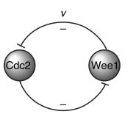

which is related to the previous one by Wee1.
Let $x$ denote active Cdc2 and $y$ denote active Wee1.
Both $x$ and $y$ both have inactive forms whose concentrations will be $1-x$ and $1-y$, respectively.

We can write the dynamics of $x$ and $y$ as

\begin{align*}
\frac{dx}{dt}&=α_1(1-x)-β_1x\frac{(vy_1)^{γ_1}}{K_1+(vy_1)^{γ_1}}\\
\frac{dy}{dt}&=α_2(1-y)-β_2y\frac{x_1^{γ_2}}{K_2+x_1^{γ_2}}
\end{align*}

where $v$ is an adjustable parameter that basically dictates how strong the negative feedback of Wee1 is on Cdc2. An interesting thing about this system is that for certain values of $v$, it has bistability and shows a hysteretic response.

In [18]:
from scipy.integrate import odeint

def uh(x, k, n):
    return x**n/(k+x**n)

def dh(x, k, n):
    return k**n/(k+x**n)

def dx1dt(x_1, y_1, v=1):
    α_1 = 1
    β_1 = 200
    γ_1 = 4
    K_1 = 30
    return α_1*(1-x_1)-β_1*x_1*uh(v*y_1, K_1, γ_1)

def dy1dt(x_1, y_1, v=1):
    α_2 = 1
    β_2 = 10
    γ_2 = 4
    K_2 = 1
    return α_2*(1-y_1)-β_2*y_1*uh(x_1, K_2, γ_2)

def dxydt(xy, t, v):
    x, y = xy
    return dx1dt(x, y, v=v), dy1dt(x, y, v=v)

xy = np.random.rand(2,)

vs = np.arange(0.0, 2.5, 0.01)
vs = np.concatenate([vs, vs[::-1]])

ys = np.empty((len(vs), ))

for i in range(len(vs)):
    t = np.arange(0.0, 10.0, 0.01)
    data = scipy.integrate.odeint(dxydt, xy, t, args=tuple([vs[i]]))
    xy = data[-1]
    ys[i] = data[-1][1]

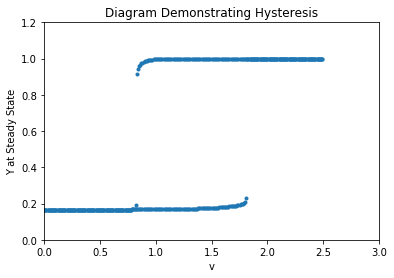

In [19]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation, rc

import matplotlib.cm as cm


rc('animation', html='html5')


def animate_curve(x, y):

    fig, ax = plt.subplots()
    line, = ax.plot(x, y, '.')
    
    ax.set_xlabel("v")
    ax.set_ylabel("Y at Steady State")
    ax.set_title("Diagram Demonstrating Hysteresis")

    def update(num, x, y, line):
        line.set_data(x[:num], y[:num])
        line.axes.axis([0, 3, 0, 1.2])
        return line,

    return animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                                  interval=10, blit=True)

x = np.linspace(0, 10, 100)
y = np.sin(x)


ani = animate_curve(vs, ys)

ani

Above we show an animation of one path through the system.
To get this image we began at a random state with $v=0$, then advanced enough time to get to the steady state.
We then increased $v$ a little bit and recalibrated to the steady state.
By did this repeatedly, slowly increasing $v$ from $0$ to $2.5$, then decreasing it back to $0$.
We can see how the value of $y$ depends on its history; if $y$ was at the lower steady state around $v=1.3$, then after increasing $v$ to $1.4$, it will remain at the lower steady state, while if $y$ was at the higher steady state around $v=1.3$, it will instead be there at $v=1.4$.

This property of the value of a variable depending on its history is called hysteresis.
Below, we plotted the same graph but with the color showing the path of the value of $y$.
The red region denotes the end of the particle, the green the middle, and the blue the end.

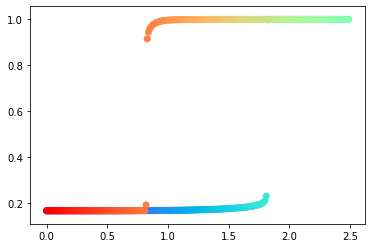

In [20]:
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.scatter(vs, ys, color=colors)

[Here](https://www.pnas.org/content/101/7/1822) is the paper by Angeli Et al. upon which Alon based this example.
The PDF version had viewable equations for me, though I wasn't able to see them on the website itself.

In conclusion, many general properties of small dynamical systems are easily visible by plots like those shown here. 
In the future, we can improve these models by adding stochastic noise, and we can try to mathematically analyze the systems for properties like their bifurcation points.

Further Reading:

- [Modeling the Cell Cycle: Why Do Certain Circuits Oscillate?](https://www.sciencedirect.com/science/article/pii/S0092867411002431) by Ferrell, Tsai, and Yang
- https://en.wikipedia.org/wiki/Hysteresis
- https://en.wikipedia.org/wiki/Biochemical_switches_in_the_cell_cycle
